In [1]:
from test_beta_package import *
%matplotlib inline

In [2]:
# confirm the folder structure and load the variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()


In [3]:
# load the processed pickle files  
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


In [4]:
# obtain the information from pickles
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)
print(predictors_name_list)

['B Speeds', 'C Body_direction', 'D Allo_head_direction', 'G Neck_elevation', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth', 'N Back_pitch', 'O Back_azimuth', 'P Ego2_head_roll', 'Q Ego2_head_pitch', 'R Ego2_head_azimuth', 'B Speeds_1st_der', 'C Body_direction_1st_der', 'C Body_direction_2nd_der', 'D Allo_head_direction_1st_der', 'D Allo_head_direction_2nd_der', 'G Neck_elevation_1st_der', 'G Neck_elevation_2nd_der', 'K Ego3_Head_roll_1st_der', 'K Ego3_Head_roll_2nd_der', 'L Ego3_Head_pitch_1st_der', 'L Ego3_Head_pitch_2nd_der', 'M Ego3_Head_azimuth_1st_der', 'M Ego3_Head_azimuth_2nd_der', 'N Back_pitch_1st_der', 'N Back_pitch_2nd_der', 'O Back_azimuth_1st_der', 'O Back_azimuth_2nd_der', 'P Ego2_head_roll_1st_der', 'P Ego2_head_roll_2nd_der', 'Q Ego2_head_pitch_1st_der', 'Q Ego2_head_pitch_2nd_der', 'R Ego2_head_azimuth_1st_der', 'R Ego2_head_azimuth_2nd_der']


In [5]:
# assign values to the inference parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=2,
                                 tolerance=10 ** -5, num_predictors=3, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="inputdriven", optim_method="em")

In [6]:
cells_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')

cell indices are [35]


In [7]:
glmhmms_ista, process_neur, inpts, T, tot_masked_indices, path_plots_list, dict_objects_multicov = \
   data_structure_multipredictor(path_analysis_dir, path_info_dir, path_multi_pred_dir, data_continous_ratemaps,
                            data_binned_glm, dict_param, tot_time, cells_index, best_predictors='best_predictors.csv')
print(glmhmms_ista)

           Predictors'
0             B Speeds
1     B Speeds_1st_der
2     K Ego3_Head_roll
3    L Ego3_Head_pitch
4  M Ego3_Head_azimuth
test for plot folder
!Fraction missing points is 0.014345544042859863 for the model 0
!Fraction missing points is 0.014345544042859863 for the model 1
[<ssm.hmm.HMM object at 0x000002587FD737F0>, <ssm.hmm.HMM object at 0x0000025849BFF220>]


In [8]:
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section_multi_predictor(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista,
                                                                       process_neur=process_neur,
                                                                       inputs_list=inpts)

the model is 0 thus with 2 states


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 0 is 3.2988388538360596
the model is 1 thus with 3 states


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 1 is 4.808751821517944
The total time for the inference is 8.107590675354004


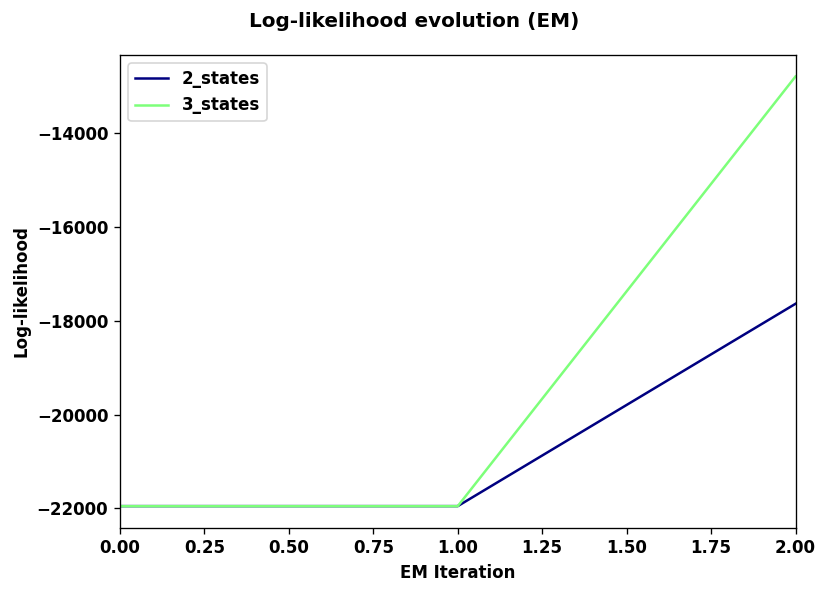

In [9]:
log_like_evolution_per_states(path_analysis_dir, path_info_dir, fit_ll_states_list=fit_ll_states_list, dict_processed_objects=None,
                                  multipredictor=0)

In [10]:
%%capture cap --no-stderr
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param, glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                           inputs_list=inpts, multipredictor=0)

In [11]:
posterior_probs_list

[[[array([[1.81575141e-02, 9.81842486e-01],
          [6.88431003e-26, 1.00000000e+00],
          [3.36156279e-28, 1.00000000e+00],
          ...,
          [9.99995112e-01, 4.88802757e-06],
          [9.99993207e-01, 6.79269489e-06],
          [9.99994816e-01, 5.18380720e-06]])]],
 [[array([[3.96415951e-01, 4.84913444e-02, 5.55092705e-01],
          [9.99999995e-01, 5.39913082e-15, 4.97071628e-09],
          [1.00000000e+00, 3.34966799e-18, 2.01600225e-90],
          ...,
          [7.02906507e-06, 9.99966637e-01, 2.63335747e-05],
          [8.12148081e-06, 9.99960064e-01, 3.18144877e-05],
          [6.08775401e-06, 9.99966557e-01, 2.73551650e-05]])]]]

In [12]:
# %%capture cap --no-stderr
# take the cumulative occupancy per state
states_occupancies = states_occupancies_computation(path_analysis_dir, path_info_dir, posterior_probs_list=posterior_probs_list, multipredictor=0)


[[3.96415951e-01 4.84913444e-02 5.55092705e-01]
 [9.99999995e-01 5.39913082e-15 4.97071628e-09]
 [1.00000000e+00 3.34966799e-18 2.01600225e-90]
 ...
 [7.02906507e-06 9.99966637e-01 2.63335747e-05]
 [8.12148081e-06 9.99960064e-01 3.18144877e-05]
 [6.08775401e-06 9.99966557e-01 2.73551650e-05]]
[[3.96415951e-01 4.84913444e-02 5.55092705e-01]
 [9.99999995e-01 5.39913082e-15 4.97071628e-09]
 [1.00000000e+00 3.34966799e-18 2.01600225e-90]
 ...
 [7.02906507e-06 9.99966637e-01 2.63335747e-05]
 [8.12148081e-06 9.99960064e-01 3.18144877e-05]
 [6.08775401e-06 9.99966557e-01 2.73551650e-05]]


In [13]:
print(states_occupancies)

[0.4800447  0.37343248 0.14652282]


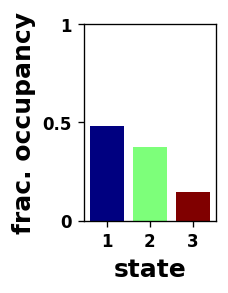

In [14]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=dict_param, states_occupancies=states_occupancies, multipredictor=0)

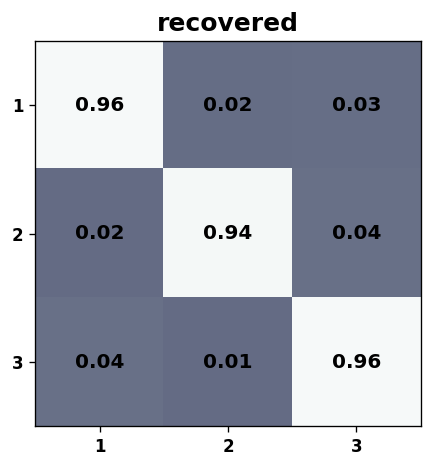

In [15]:
transition_prob_matrix(path_analysis_dir, path_info_dir, dict_param=0, dict_processed_objects=0, comp_istance=1, multipredictor=0)

inferred and transformed weights are {'2_states': [array([[[0.53151793, 0.52625884, 0.47690279]],

       [[0.51457041, 0.47257839, 0.50472761]]])], '3_states': [array([[[0.51278658, 0.47218317, 0.46716265]],

       [[0.52923632, 0.51762299, 0.48853413]],

       [[0.99999996, 0.5351971 , 0.52027348]]])]}
[0.47690279 0.50472761]
[[0.53151793 0.52625884 0.47690279]
 [0.51457041 0.47257839 0.50472761]]
[0.46716265 0.48853413 0.52027348]
[[0.51278658 0.47218317 0.46716265]
 [0.52923632 0.51762299 0.48853413]
 [0.99999996 0.5351971  0.52027348]]


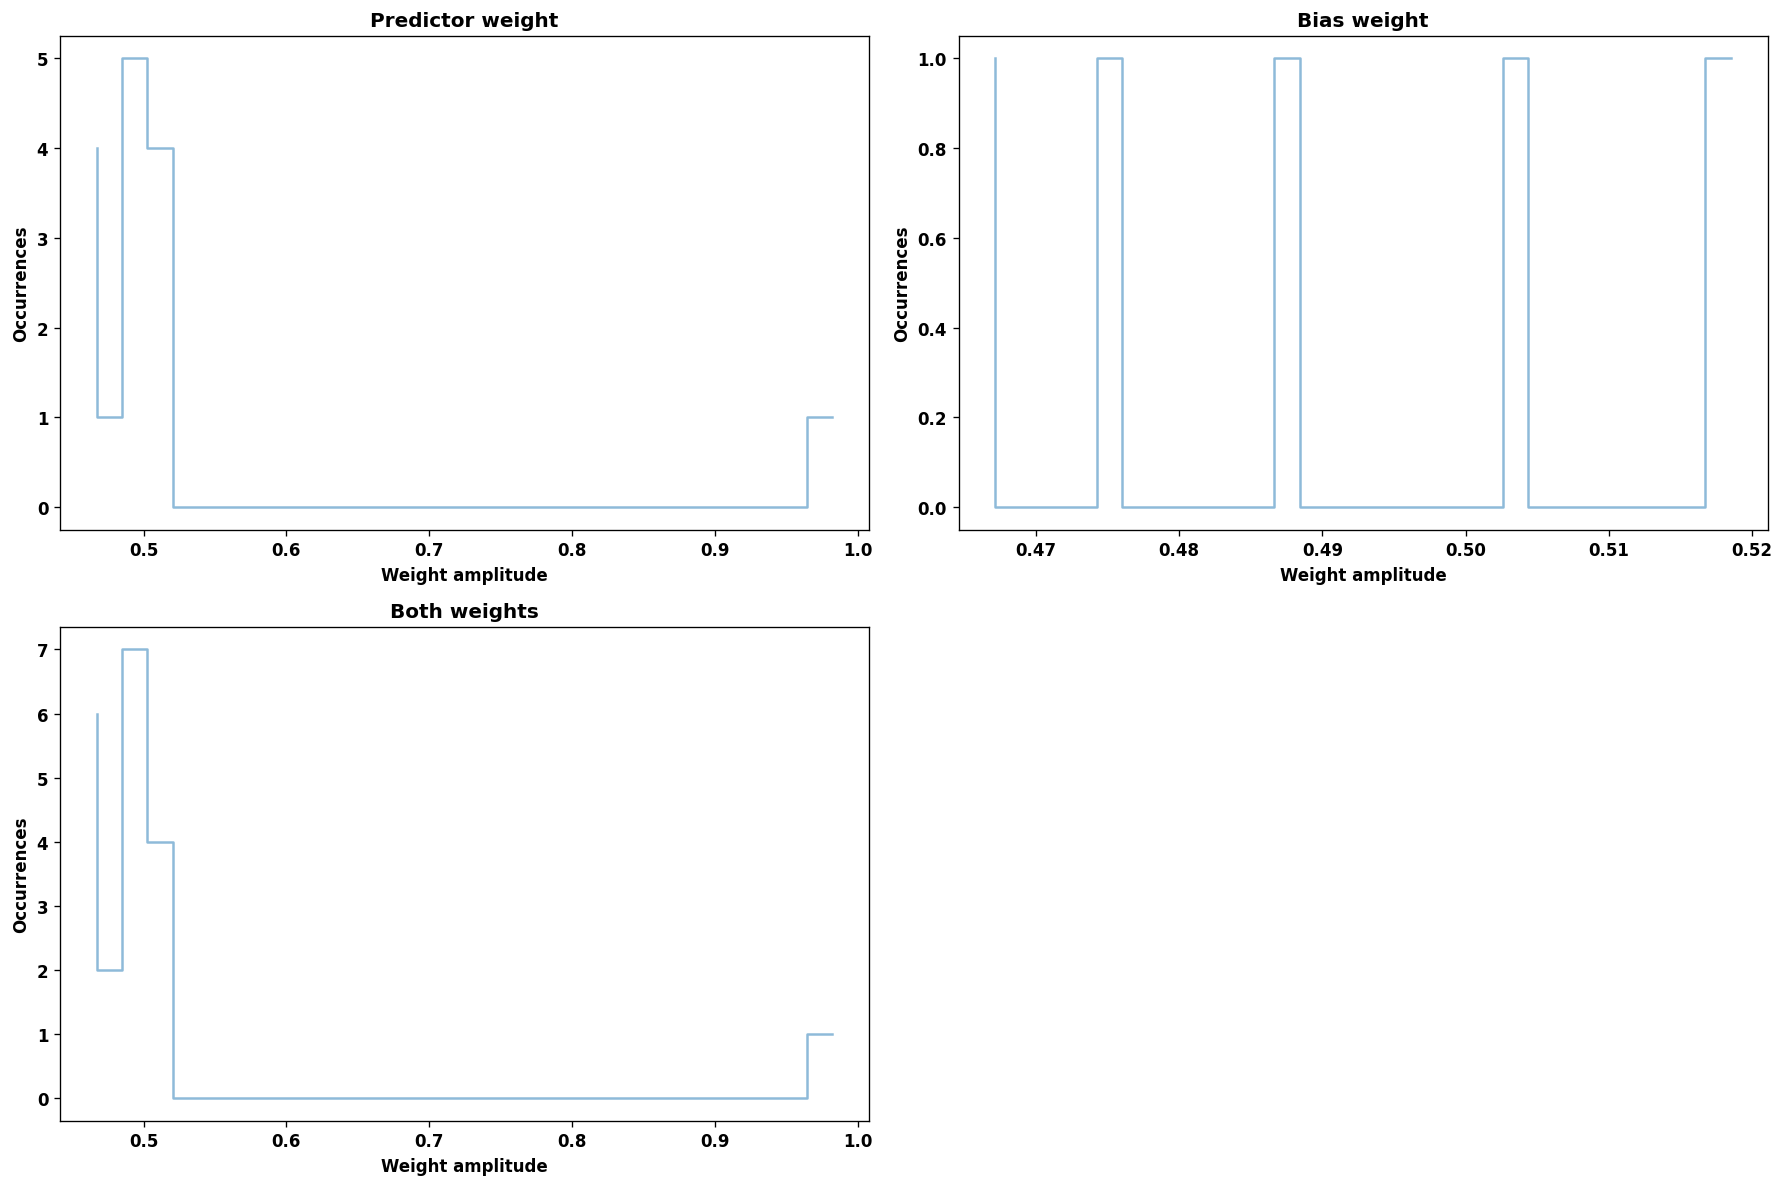

In [16]:
weights_distribution_histogram(path_analysis_dir, path_info_dir, multipredictor=0)